# Project 2 Loan Prediction Dataset Final Notebook
## Ryan Rosiak and Grant Dawson
## Due: 11/12/21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile
import urllib
from scipy import linalg
import matplotlib as mpl
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from functions import *

In [2]:
# Setting up data for KNN graphs
LoanDataTrain, LoanDataTest = load_data()

# Cleaning the data

### In order to work the data correctly and efficiently, we must clean the data and get rid of any data that could
### get in the way of our analysis such as null values or data that isn't given.

In [3]:
count_nan(LoanDataTrain)
LoanDataTrain = clean_data(LoanDataTrain)
LoanDataTest = clean_data(LoanDataTest)
count_nan(LoanDataTrain)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [4]:
# Setting up data for logistic regression graphs
lp_df = pd.read_csv('../Dataset/loan-train.csv', header=0)
lp_df['LoanAmount'] = lp_df['LoanAmount'] * 1000
# Replace the NAN values in each column
lp_df['Gender'] = lp_df['Gender'].fillna('Not Specified')
lp_df['Married'] = lp_df['Married'].fillna('Not Specified')
lp_df['Dependents'] = lp_df['Dependents'].fillna(0)
lp_df['Self_Employed'] = lp_df['Self_Employed'].fillna('No')
lp_df['LoanAmount'] = lp_df['LoanAmount'].fillna(0)
lp_df['Loan_Amount_Term'] = lp_df['Loan_Amount_Term'].fillna(0)
lp_df['Credit_History'] = lp_df['Credit_History'].fillna(0)

# Preliminary Analysis

### In this analysis, we look at some descriptive statistics about the data and see if there are any clear patterns
### that show themselves at the beginning

In [5]:
find_means(LoanDataTrain)

The mean of Loan_ID: nan
The mean of Gender: nan
The mean of Married: nan
The mean of Dependents: 0.54
The mean of Education: nan
The mean of Self_Employed: nan
The mean of ApplicantIncome: 5403.46
The mean of CoapplicantIncome: 1621.25
The mean of LoanAmount: 141.17
The mean of Loan_Amount_Term: 334.2
The mean of Credit_History: 0.77
The mean of Property_Area: nan
The mean of Loan_Status: nan


In [6]:
count_types(LoanDataTrain)


"Loan_ID's" Values with count are :
LP001836    1
LP001972    1
LP001151    1
LP001693    1
LP002225    1
           ..
LP001811    1
LP002131    1
LP001392    1
LP001255    1
LP001439    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male             489
Female           112
Not Specified     13
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes              398
No               213
Not Specified      3
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     532
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    19

# Preliminary Analysis Graphs

### Below, are graphs used in our paper to display various relationships within the dataset. All of these figures 
### are linked to their corresponding graph in the paper.

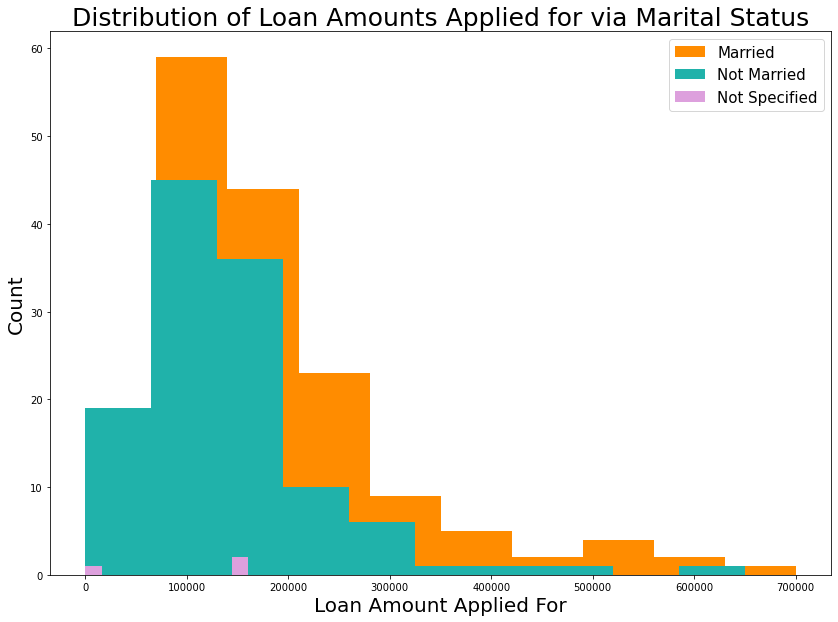

In [7]:
plot_loan_amounts_vs_marital_status(lp_df)

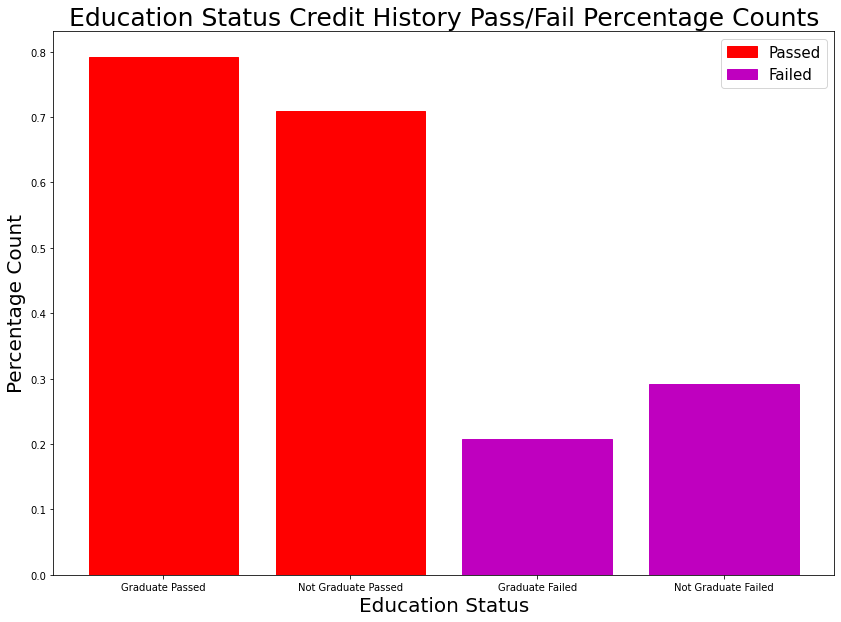

In [8]:
plot_education_status_vs_credit_history(lp_df)

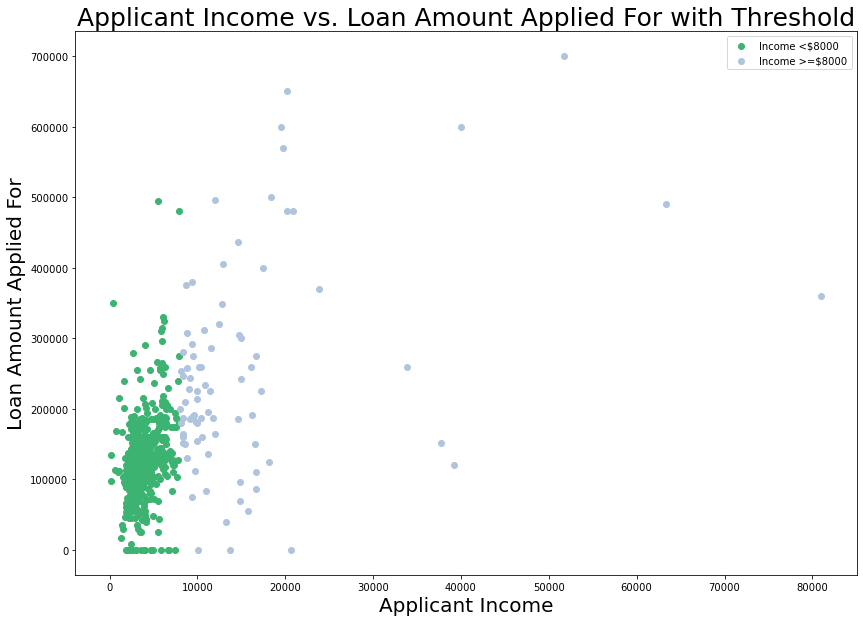

In [9]:
plot_applicant_income_vs_loan_amount_applied(lp_df)

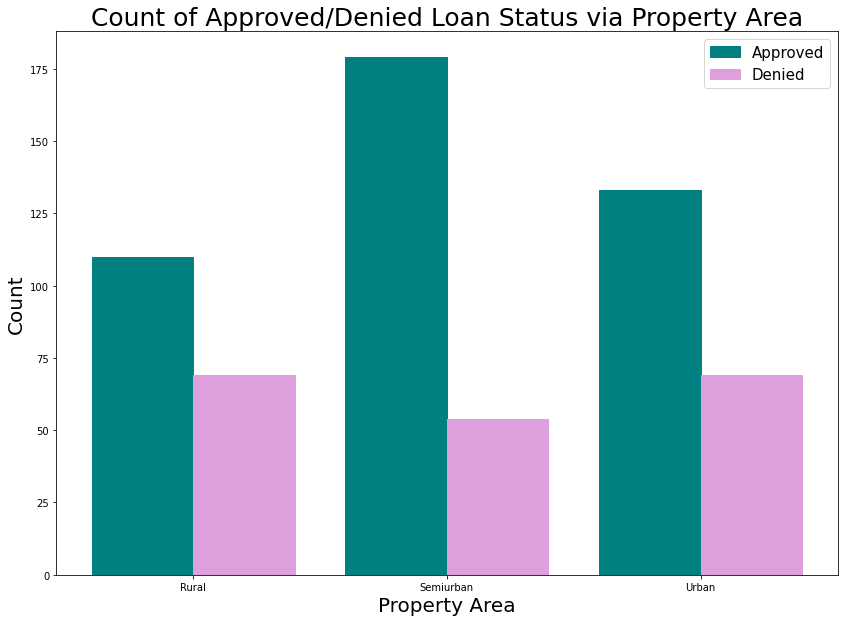

In [10]:
plot_property_area_vs_loan_status(lp_df)

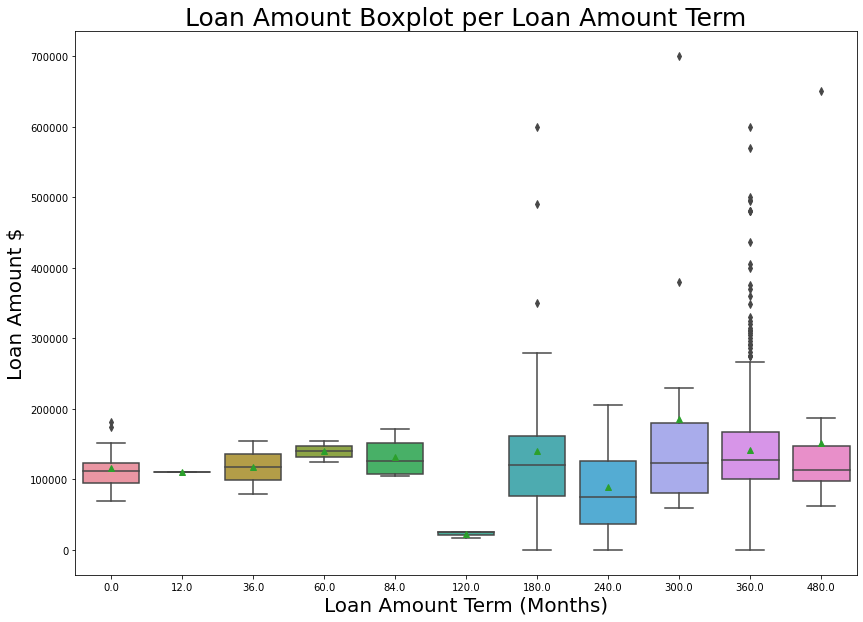

In [11]:
plot_loan_amount_vs_loan_amount_term(lp_df)

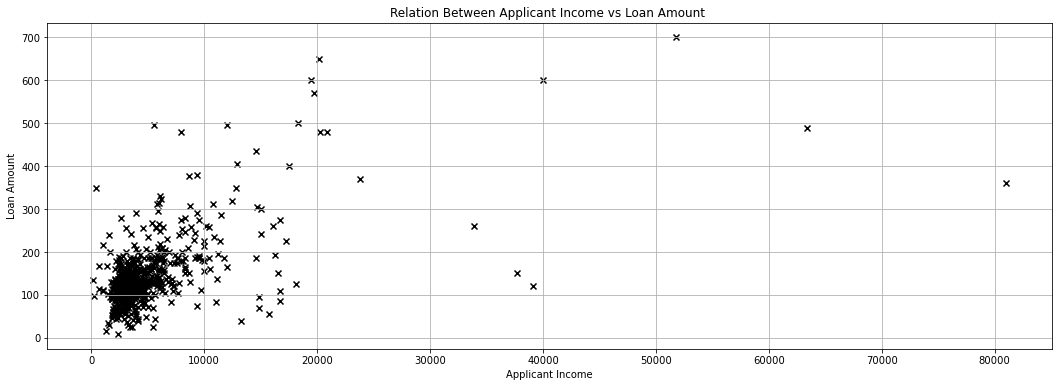

In [12]:
ApplicantVSLoanAmmount(LoanDataTrain)

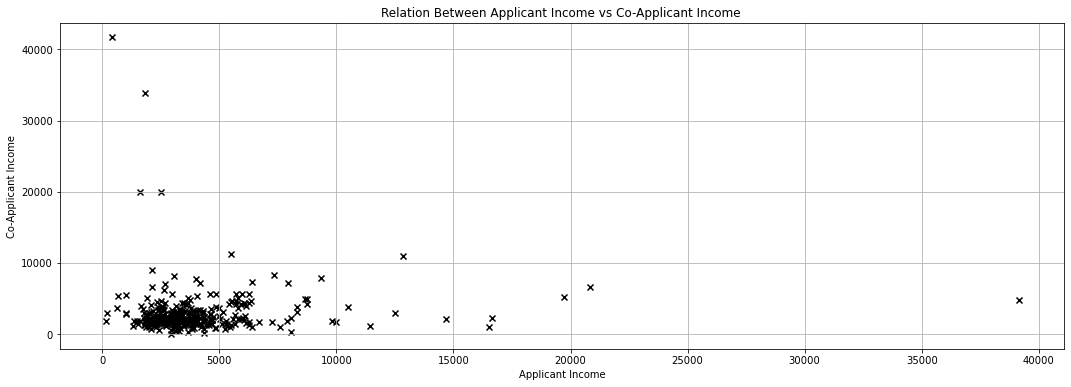

In [13]:
ApplicantVSCoApplicant(LoanDataTrain)

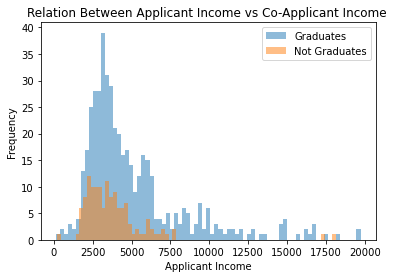

In [14]:
GradVSNotGradIncome(LoanDataTrain)

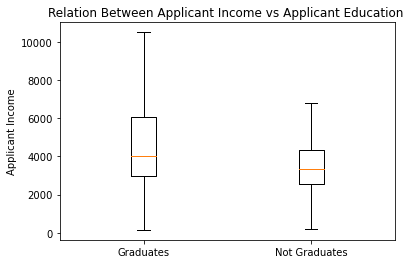

In [15]:
applicantIncomeGradeVSNot(LoanDataTrain)

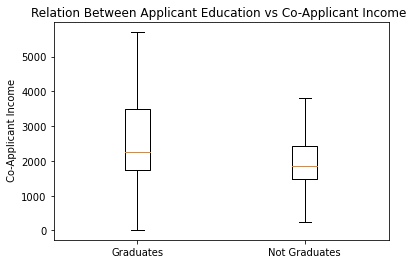

In [16]:
CoapplicantIncomeGradeVSNot(LoanDataTrain)

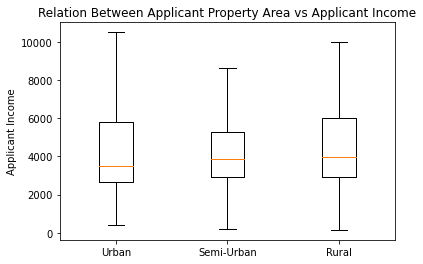

In [17]:
IncomeVSLocation(LoanDataTrain)

# Logistic Regression

### Everything below is the full analysis, accuracy measurements, and classification metrics of our logistic regression model
### as it pertains to assessing risk in loan prediction.

In [18]:
# ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
X_lp_train = lp_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
Y_lp_train = lp_df[['Loan_Status']]
# Change the Y values from N : Y to 0 : 1
Y_lp_train.loc[Y_lp_train['Loan_Status'] == 'N', 'Loan_Status'] = 0
Y_lp_train.loc[Y_lp_train['Loan_Status'] == 'Y', 'Loan_Status'] = 1
# Split the data 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X_lp_train.values, Y_lp_train.values.ravel(), test_size=.3)
Y_train = Y_train.astype('int')
# Fit and transform the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

/home/ryan/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-18-f8a4b1b8542b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_lp_train.loc[Y_lp_train['Loan_Status'] == 'N', 'Loan_Status'] = 0
<ipython-input-18-f8a4b1b8542b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_lp_train.loc[Y_lp_train['Loan_Status'] =

In [19]:
# Compute the linear regression
log_reg = LogisticRegression()
log_reg = log_reg.fit(X_train, Y_train)

In [20]:
print_cross_val_score_with_fold(log_reg, X_train, Y_train, 3, "accuracy")
print_cross_val_score_with_fold(log_reg, X_train, Y_train, 5, "accuracy")
print_cross_val_score_with_fold(log_reg, X_train, Y_train, 7, "accuracy")

Fold = 3
Cross Validation Score: [0.70629371 0.71328671 0.72727273]
Fold = 5
Cross Validation Score: [0.73255814 0.72093023 0.70930233 0.70930233 0.74117647]
Fold = 7
Cross Validation Score: [0.72580645 0.70967742 0.72131148 0.70491803 0.72131148 0.72131148
 0.73770492]


In [21]:
print_confusion_matrix_and_stats(log_reg, X_train, Y_train, 3)
print_confusion_matrix_and_stats(log_reg, X_train, Y_train, 5)
print_confusion_matrix_and_stats(log_reg, X_train, Y_train, 7)

Fold = 3
Confusion Matrix:
 [[  4 118]
 [  4 303]]
Precision Score: 0.7197149643705463
Recall Score: 0.9869706840390879
F1 Score: 0.8324175824175825
Fold = 5
Confusion Matrix:
 [[  4 118]
 [  1 306]]
Precision Score: 0.7216981132075472
Recall Score: 0.996742671009772
F1 Score: 0.8372093023255813
Fold = 7
Confusion Matrix:
 [[  5 117]
 [  3 304]]
Precision Score: 0.7220902612826603
Recall Score: 0.990228013029316
F1 Score: 0.8351648351648352


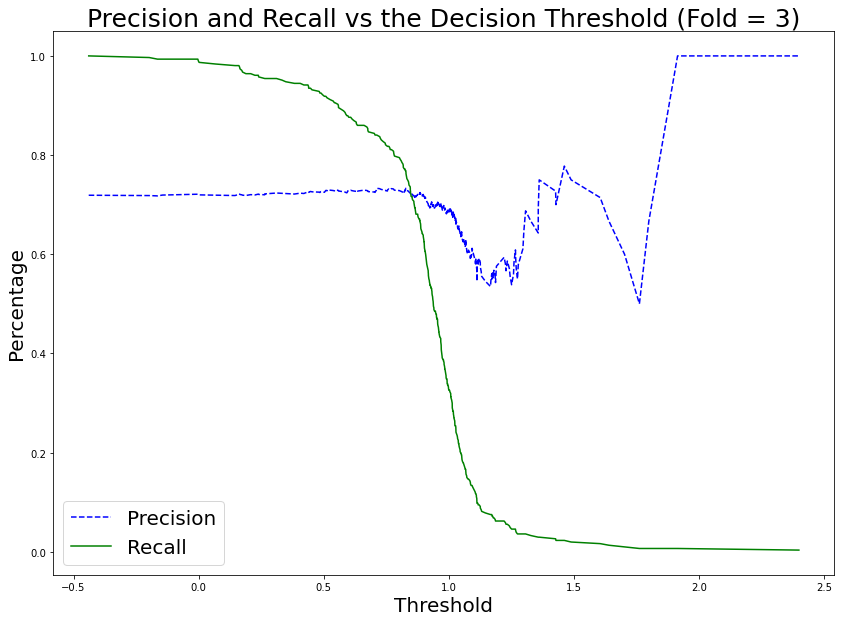

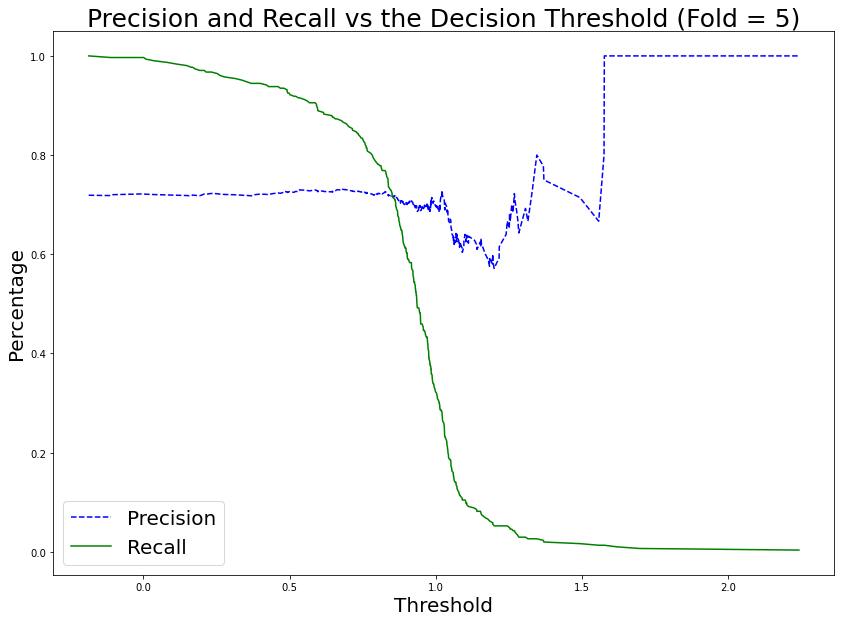

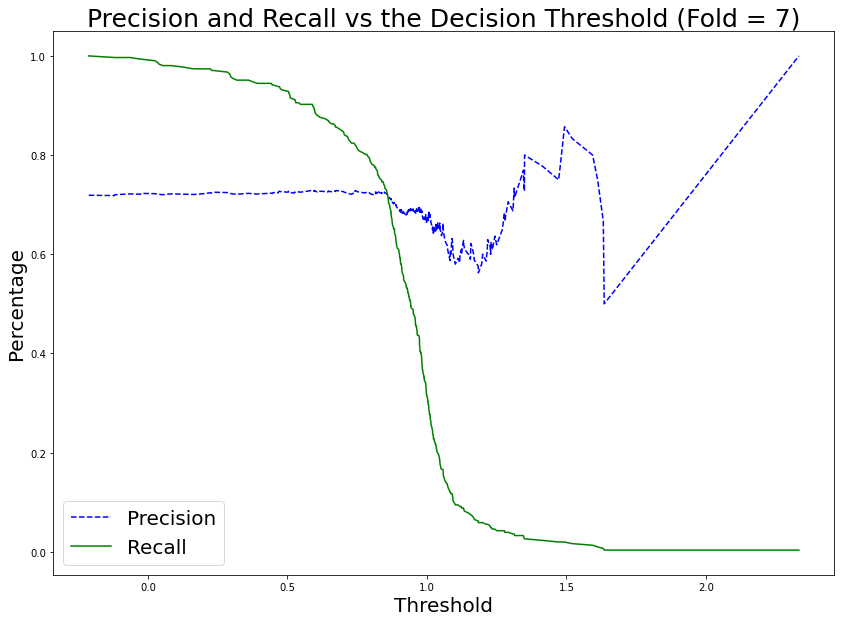

In [22]:
compute_scores_and_plot_precision_recall_vs_threshold(log_reg, X_train, Y_train, 3, "decision_function")
compute_scores_and_plot_precision_recall_vs_threshold(log_reg, X_train, Y_train, 5, "decision_function")
compute_scores_and_plot_precision_recall_vs_threshold(log_reg, X_train, Y_train, 7, "decision_function")

ROC AUC Score:
0.4812303091792599


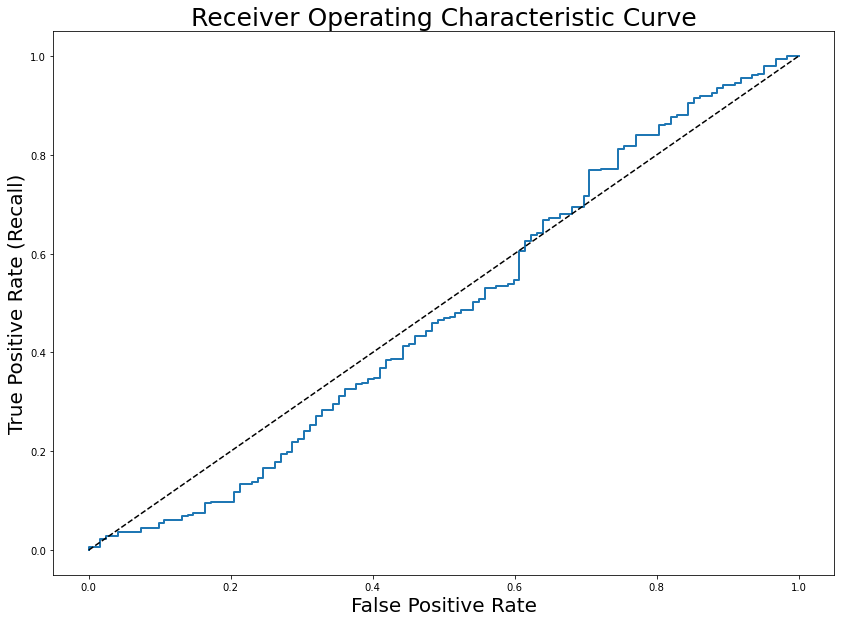

ROC AUC Score:
0.48470123351310945


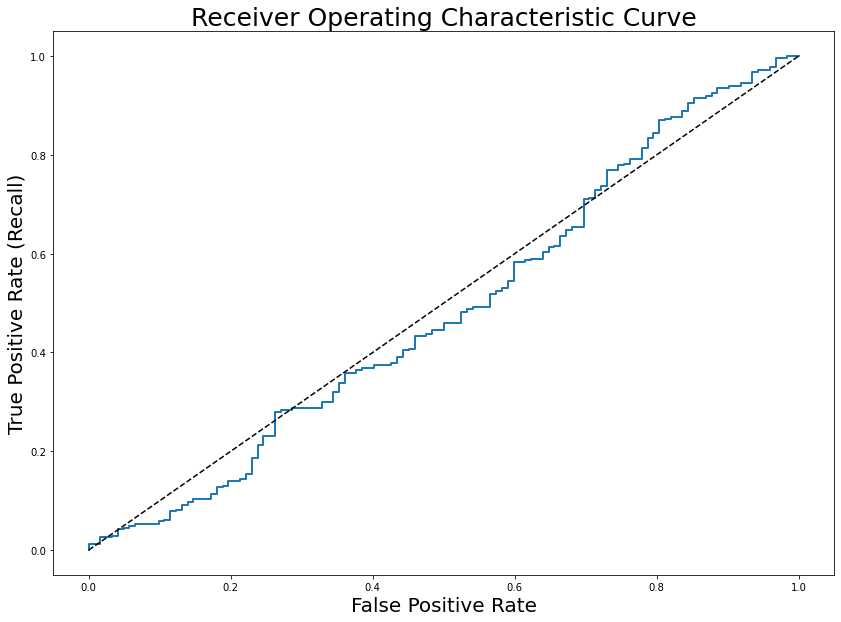

ROC AUC Score:
0.46801409729267907


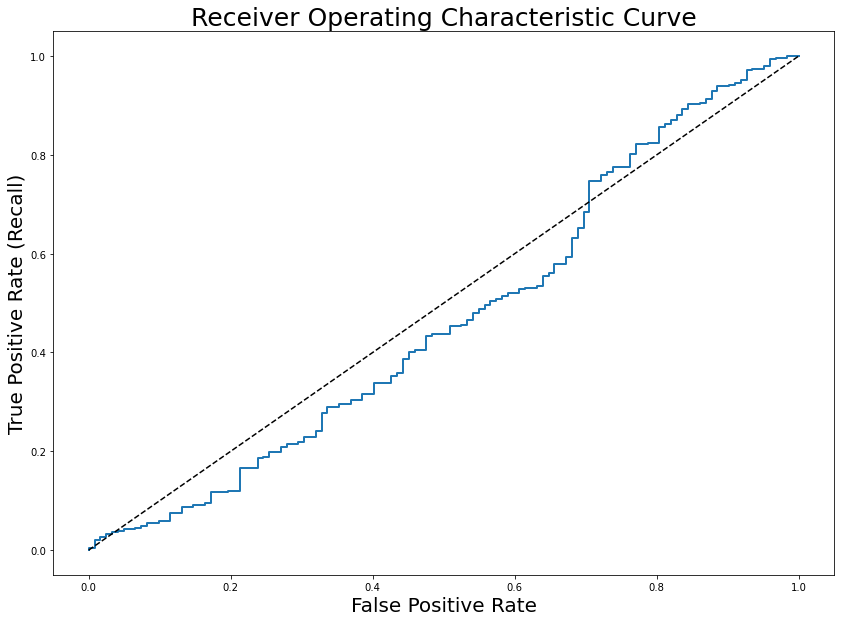

In [23]:
plot_roc_curve_and_print_roc_auc_score(log_reg, X_train, Y_train, 3, "decision_function")
plot_roc_curve_and_print_roc_auc_score(log_reg, X_train, Y_train, 5, "decision_function")
plot_roc_curve_and_print_roc_auc_score(log_reg, X_train, Y_train, 7, "decision_function")

In [24]:
y_predictions = log_reg.predict(X_train)
print_accuracy_score(Y_train, y_predictions)

Accuracy Score: 0.7202797202797203


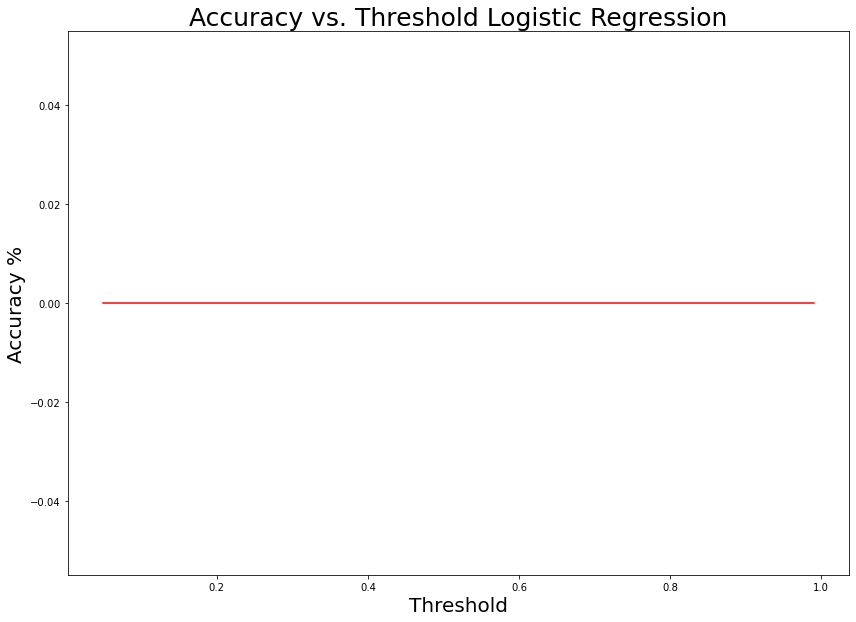

In [25]:
threshold_list, accuracy_per_threshold = get_threshold_list_and_corresponding_accuracy(log_reg, X_train, Y_train)
plot_accuracy_vs_threshold(threshold_list, accuracy_per_threshold)

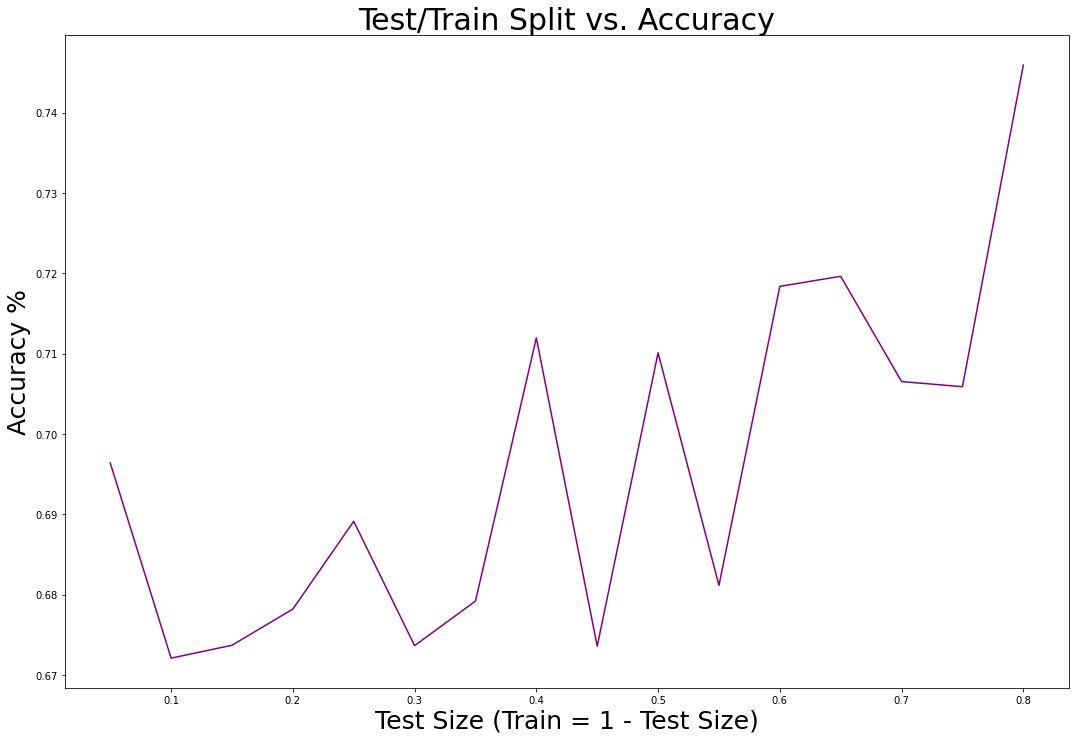

In [26]:
test_size_list, accuracy_list = compute_testtrain_split_accuracy(X_lp_train, Y_lp_train)
plot_testtrain_slit_vs_accuracy(test_size_list, accuracy_list)

# K-Nearest Neighbors

### Everything below is the full analysis, accuracy measurements, and classification metrics of our k-nearest neighbors model
### as it pertains to assessing risk in loan prediction

/home/ryan/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/ryan/Repositories/DSCI470/Project_2_Loan_Prediction_Dataset/FinalNotebookSubmission/functions.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YTrain.loc[YTrain['Loan_Status'] == 'N', 'Loan_Status'] = 0
/home/ryan/Repositories/DSCI470/Project_2_Loan_Prediction_Dataset/FinalNotebookSubmission/functions.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

Before for loop
In for loop 5
Final accuracy check for k=5 : 0.6378378378378379
Confusion Matrix for k=5:
 [[ 12  46]
 [ 21 106]]
Precission Score for k=5:
 0.6973684210526315
Recall Score for k=5:
 0.8346456692913385
F1 score for k=5:
 0.7598566308243727
In for loop 6
Final accuracy check for k=6 : 0.5837837837837838
Confusion Matrix for k=6:
 [[15 43]
 [34 93]]
Precission Score for k=6:
 0.6838235294117647
Recall Score for k=6:
 0.7322834645669292
F1 score for k=6:
 0.7072243346007604
In for loop 7
Final accuracy check for k=7 : 0.654054054054054
Confusion Matrix for k=7:
 [[ 13  45]
 [ 19 108]]
Precission Score for k=7:
 0.7058823529411765
Recall Score for k=7:
 0.8503937007874016
F1 score for k=7:
 0.7714285714285716
In for loop 8
Final accuracy check for k=8 : 0.6216216216216216
Confusion Matrix for k=8:
 [[17 41]
 [29 98]]
Precission Score for k=8:
 0.7050359712230215
Recall Score for k=8:
 0.7716535433070866
F1 score for k=8:
 0.7368421052631577
In for loop 9
Final accuracy chec

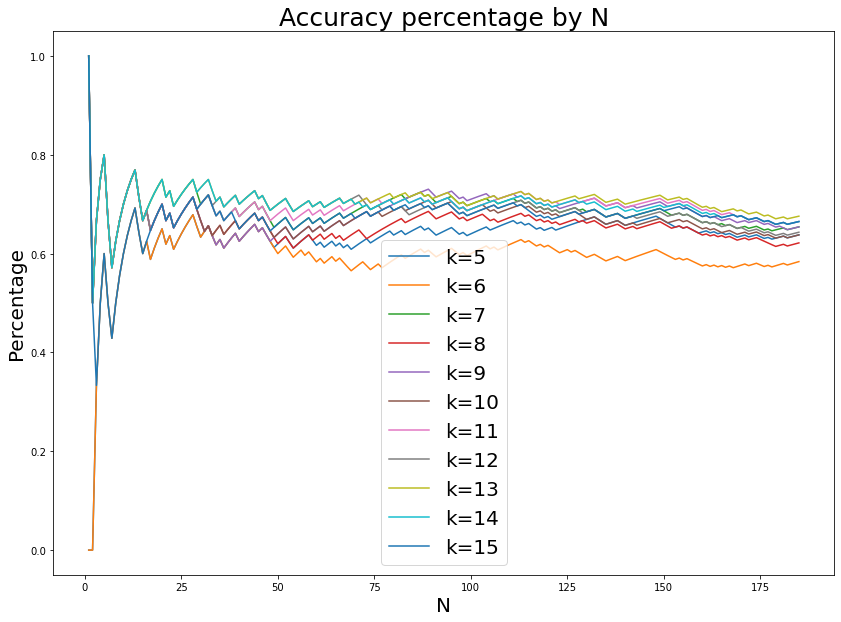

In [27]:
KNNGraph(LoanDataTrain, 5, 15)